> **提示**：欢迎参加“调查数据集”项目！引用段会添加这种提示，帮助你制定调查方法。提交项目之前，最后浏览一下报告，将这一段删除，以保持报告简洁。首先，需要双击这个 Markdown 框，将标题更改为与数据集和调查相关的标题。

# 项目：调查数据集（足球数据库！）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> **提示**：在这一段报告中对你选择进行分析的数据集进行简要介绍。在本段末尾，对你计划在报告过程中探索的问题进行描述。自己尝试建立至少一个因变量和三个自变量的分析报告。如果你不确定要问什么问题，务必熟悉数据集、数据集变量以及数据集上下文，以便确定要探索的问题。

> 如果尚未选择和下载数据，务必先进行这一步，再回到这里。如需在这个工作区中处理数据，还需要将其上传到工作区。因此，请单击左上角的 jupyter 图标，回到工作区目录。右上角有一个‘上传’按钮，可以将你的数据文件添加到工作区。然后单击 .ipynb 文件名，回到这里。

<pre>
Tables describe with some sample data:

Table Name : Player_Attributes
CREATE TABLE "Player_Attributes" (
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,  # 球员属性ID(PK)
	`player_fifa_api_id`	INTEGER,            # 球员FIFA api ID(FK AS `Player`(`player_fifa_api_id`))
	`player_api_id`	INTEGER,                    # 球员api ID(FK AS `Player`(`player_api_id`))
	`date`	TEXT,                               # 日期(::DATE)
	`overall_rating`	INTEGER,                # 总体评分
	`potential`	INTEGER,                        # 潜力
	`preferred_foot`	TEXT,                   # 习惯用脚
	`attacking_work_rate`	TEXT,               # 攻击级别
	`defensive_work_rate`	TEXT,               # 防守级别
	`crossing`	INTEGER,                        # 传中
	`finishing`	INTEGER,                        # 射门
	`heading_accuracy`	INTEGER,                # 头球
	`short_passing`	INTEGER,                    # 短传
	`volleys`	INTEGER,                        # 抽射
	`dribbling`	INTEGER,                        # 盘带
	`curve`	INTEGER,                            # 弧线球
	`free_kick_accuracy`	INTEGER,            # 任意球
	`long_passing`	INTEGER,                    # 长传
	`ball_control`	INTEGER,                    # 控球
	`acceleration`	INTEGER,                    # 加速
	`sprint_speed`	INTEGER,                    # 速度
	`agility`	INTEGER,                        # 灵活
	`reactions`	INTEGER,                        # 反应
	`balance`	INTEGER,                        # 平衡
	`shot_power`	INTEGER,                    # 射门力量
	`jumping`	INTEGER,                        # 弹跳
	`stamina`	INTEGER,                        # 体力
	`strength`	INTEGER,                        # 强壮
	`long_shots`	INTEGER,                    # 远射
	`aggression`	INTEGER,                    # 侵略性
	`interceptions`	INTEGER,                    # 拦截
	`positioning`	INTEGER,                    # 站位
	`vision`	INTEGER,                        # 视野
	`penalties`	INTEGER,                        # 点球
	`marking`	INTEGER,                        # 盯人
	`standing_tackle`	INTEGER,                # 抢断
	`sliding_tackle`	INTEGER,                # 铲球
	`gk_diving`	INTEGER,                        # 守门扑救
	`gk_handling`	INTEGER,                    # 守门手控球
	`gk_kicking`	INTEGER,                    # 守门开球
	`gk_positioning`	INTEGER,                # 守门站位
	`gk_reflexes`	INTEGER,                    # 守门反应
	FOREIGN KEY(`player_fifa_api_id`) REFERENCES `Player`(`player_fifa_api_id`),
	FOREIGN KEY(`player_api_id`) REFERENCES `Player`(`player_api_id`)
)

(1, 218353, 505942, '2016-02-18 00:00:00', 67, 71, 'right', 'medium', 'medium', 49, 44, 71, 61, 44, 51, 45, 39, 64, 49, 60, 64, 59, 47, 65, 55, 58, 54, 76, 35, 71, 70, 45, 54, 48, 65, 69, 69, 6, 11, 10, 8, 8)

Table Name : Player
CREATE TABLE `Player` (
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,    # 球员ID(PK)
	`player_api_id`	INTEGER UNIQUE,               # 球员api ID
	`player_name`	TEXT,                         # 球员名
	`player_fifa_api_id`	INTEGER UNIQUE,       # 球员fifa api id
	`birthday`	TEXT,                             # 生日(::DATE)
	`height`	INTEGER,                          # 身高
	`weight`	INTEGER                           # 体重
)

(1, 505942, 'Aaron Appindangoye', 218353, '1992-02-29 00:00:00', 182.88, 187)

Table Name : Match
CREATE TABLE `Match` (
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,    # 比赛ID(PK)
	`country_id`	INTEGER,                      # 国家ID(FK AS `country`(`id`))
	`league_id`	INTEGER,                          # 联盟ID(FK AS `League`(`id`))
	`season`	TEXT,                             # 赛季
	`stage`	INTEGER,                              # 场次
	`date`	TEXT,                                 # 日期(::DATE)
	`match_api_id`	INTEGER UNIQUE,               # 比赛api ID
	`home_team_api_id`	INTEGER,                  # 主场队api ID(FK AS `Team`(`team_api_id`))
	`away_team_api_id`	INTEGER,                  # 客场队api ID(FK AS `Team`(`team_api_id`))
	`home_team_goal`	INTEGER,                  # 主场队进球数
	`away_team_goal`	INTEGER,                  # 客场队进球数
	`home_player_X1`	INTEGER,                  # 主场队球员X1
	`home_player_X2`	INTEGER,                  # 主场队球员X2
	`home_player_X3`	INTEGER,                  # 主场队球员X3
	`home_player_X4`	INTEGER,                  # 主场队球员X4
	`home_player_X5`	INTEGER,                  # 主场队球员X5
	`home_player_X6`	INTEGER,                  # 主场队球员X6
	`home_player_X7`	INTEGER,                  # 主场队球员X7
	`home_player_X8`	INTEGER,                  # 主场队球员X8
	`home_player_X9`	INTEGER,                  # 主场队球员X9
	`home_player_X10`	INTEGER,                  # 主场队球员X10
	`home_player_X11`	INTEGER,                  # 主场队球员X11
	`away_player_X1`	INTEGER,                  # 客场队球员X1
	`away_player_X2`	INTEGER,                  # 客场队球员X2
	`away_player_X3`	INTEGER,                  # 客场队球员X3
	`away_player_X4`	INTEGER,                  # 客场队球员X4
	`away_player_X5`	INTEGER,                  # 客场队球员X5
	`away_player_X6`	INTEGER,                  # 客场队球员X6
	`away_player_X7`	INTEGER,                  # 客场队球员X7
	`away_player_X8`	INTEGER,                  # 客场队球员X8
	`away_player_X9`	INTEGER,                  # 客场队球员X9
	`away_player_X10`	INTEGER,                  # 客场队球员X10
	`away_player_X11`	INTEGER,                  # 客场队球员X11
	`home_player_Y1`	INTEGER,                  # 主场队球员Y1
	`home_player_Y2`	INTEGER,                  # 主场队球员Y2
	`home_player_Y3`	INTEGER,                  # 主场队球员Y3
	`home_player_Y4`	INTEGER,                  # 主场队球员Y4
	`home_player_Y5`	INTEGER,                  # 主场队球员Y5
	`home_player_Y6`	INTEGER,                  # 主场队球员Y6
	`home_player_Y7`	INTEGER,                  # 主场队球员Y7
	`home_player_Y8`	INTEGER,                  # 主场队球员Y8
	`home_player_Y9`	INTEGER,                  # 主场队球员Y9
	`home_player_Y10`	INTEGER,                  # 主场队球员Y10
	`home_player_Y11`	INTEGER,                  # 主场队球员Y11
	`away_player_Y1`	INTEGER,                  # 客场队球员Y1
	`away_player_Y2`	INTEGER,                  # 客场队球员Y2
	`away_player_Y3`	INTEGER,                  # 客场队球员Y3
	`away_player_Y4`	INTEGER,                  # 客场队球员Y4
	`away_player_Y5`	INTEGER,                  # 客场队球员Y5
	`away_player_Y6`	INTEGER,                  # 客场队球员Y6
	`away_player_Y7`	INTEGER,                  # 客场队球员Y7
	`away_player_Y8`	INTEGER,                  # 客场队球员Y8
	`away_player_Y9`	INTEGER,                  # 客场队球员Y9
	`away_player_Y10`	INTEGER,                  # 客场队球员Y10
	`away_player_Y11`	INTEGER,                  # 客场队球员Y11
	`home_player_1`	INTEGER,                      # 主场队球员1(FK AS `Player`(`player_api_id`))
	`home_player_2`	INTEGER,                      # 主场队球员2(FK AS `Player`(`player_api_id`))
	`home_player_3`	INTEGER,                      # 主场队球员3(FK AS `Player`(`player_api_id`))
	`home_player_4`	INTEGER,                      # 主场队球员4(FK AS `Player`(`player_api_id`))
	`home_player_5`	INTEGER,                      # 主场队球员5(FK AS `Player`(`player_api_id`))
	`home_player_6`	INTEGER,                      # 主场队球员6(FK AS `Player`(`player_api_id`))
	`home_player_7`	INTEGER,                      # 主场队球员7(FK AS `Player`(`player_api_id`))
	`home_player_8`	INTEGER,                      # 主场队球员8(FK AS `Player`(`player_api_id`))
	`home_player_9`	INTEGER,                      # 主场队球员9(FK AS `Player`(`player_api_id`))
	`home_player_10`	INTEGER,                  # 主场队球员10(FK AS `Player`(`player_api_id`))
	`home_player_11`	INTEGER,                  # 主场队球员11(FK AS `Player`(`player_api_id`))
	`away_player_1`	INTEGER,                      # 客场队球员1(FK AS `Player`(`player_api_id`))
	`away_player_2`	INTEGER,                      # 客场队球员2(FK AS `Player`(`player_api_id`))
	`away_player_3`	INTEGER,                      # 客场队球员3(FK AS `Player`(`player_api_id`))
	`away_player_4`	INTEGER,                      # 客场队球员4(FK AS `Player`(`player_api_id`))
	`away_player_5`	INTEGER,                      # 客场队球员5(FK AS `Player`(`player_api_id`))
	`away_player_6`	INTEGER,                      # 客场队球员6(FK AS `Player`(`player_api_id`))
	`away_player_7`	INTEGER,                      # 客场队球员7(FK AS `Player`(`player_api_id`))
	`away_player_8`	INTEGER,                      # 客场队球员8(FK AS `Player`(`player_api_id`))
	`away_player_9`	INTEGER,                      # 客场队球员9(FK AS `Player`(`player_api_id`))
	`away_player_10`	INTEGER,                  # 客场队球员10(FK AS `Player`(`player_api_id`))
	`away_player_11`	INTEGER,                  # 客场队球员11(FK AS `Player`(`player_api_id`))
	`goal`	TEXT,                                 # 进球数
	`shoton`	TEXT,                             # 射正
	`shotoff`	TEXT,                             # 射偏
	`foulcommit`	TEXT,                         # 犯规
	`card`	TEXT,                                 # 罚牌
	`cross`	TEXT,                                 # 传球
	`corner`	TEXT,                             # 角球
	`possession`	TEXT,                         # 控球权
	`B365H`	NUMERIC,
	`B365D`	NUMERIC,
	`B365A`	NUMERIC,
	`BWH`	NUMERIC,
	`BWD`	NUMERIC,
	`BWA`	NUMERIC,
	`IWH`	NUMERIC,
	`IWD`	NUMERIC,
	`IWA`	NUMERIC,
	`LBH`	NUMERIC,
	`LBD`	NUMERIC,
	`LBA`	NUMERIC,
	`PSH`	NUMERIC,
	`PSD`	NUMERIC,
	`PSA`	NUMERIC,
	`WHH`	NUMERIC,
	`WHD`	NUMERIC,
	`WHA`	NUMERIC,
	`SJH`	NUMERIC,
	`SJD`	NUMERIC,
	`SJA`	NUMERIC,
	`VCH`	NUMERIC,
	`VCD`	NUMERIC,
	`VCA`	NUMERIC,
	`GBH`	NUMERIC,
	`GBD`	NUMERIC,
	`GBA`	NUMERIC,
	`BSH`	NUMERIC,
	`BSD`	NUMERIC,
	`BSA`	NUMERIC,
	FOREIGN KEY(`country_id`) REFERENCES `country`(`id`),
	FOREIGN KEY(`league_id`) REFERENCES `League`(`id`),
	FOREIGN KEY(`home_team_api_id`) REFERENCES `Team`(`team_api_id`),
	FOREIGN KEY(`away_team_api_id`) REFERENCES `Team`(`team_api_id`),
	FOREIGN KEY(`home_player_1`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`home_player_2`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`home_player_3`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`home_player_4`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`home_player_5`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`home_player_6`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`home_player_7`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`home_player_8`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`home_player_9`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`home_player_10`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`home_player_11`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`away_player_1`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`away_player_2`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`away_player_3`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`away_player_4`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`away_player_5`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`away_player_6`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`away_player_7`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`away_player_8`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`away_player_9`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`away_player_10`) REFERENCES `Player`(`player_api_id`),
	FOREIGN KEY(`away_player_11`) REFERENCES `Player`(`player_api_id`)
)


(1, 1, 1, '2008/2009', 1, '2008-08-17 00:00:00', 492473, 9987, 9993, 1, 1, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 1.73, 3.4, 5, 1.75, 3.35, 4.2, 1.85, 3.2, 3.5, 1.8, 3.3, 3.75, None, None, None, 1.7, 3.3, 4.33, 1.9, 3.3, 4, 1.65, 3.4, 4.5, 1.78, 3.25, 4, 1.73, 3.4, 4.2)

Table Name : League
CREATE TABLE `League` (
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,                  # 联盟ID(PK)
	`country_id`	INTEGER,                                    # 国家ID(FK AS `country`(`id`))
	`name`	TEXT UNIQUE,                                        # 联盟名
	FOREIGN KEY(`country_id`) REFERENCES `country`(`id`)
)

(1, 1, 'Belgium Jupiler League')

Table Name : Country
CREATE TABLE `Country` (
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,                  # 国家ID(PK)
	`name`	TEXT UNIQUE                                         # 国家名
)

(1, 'Belgium')

Table Name : Team
CREATE TABLE "Team" (
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,                  # 团队ID(PK)
	`team_api_id`	INTEGER UNIQUE,                             # 团队api ID
	`team_fifa_api_id`	INTEGER,                                # 团队FIFA api ID
	`team_long_name`	TEXT,                                   # 团队名全称
	`team_short_name`	TEXT                                    # 团队名缩写
)

(1, 9987, 673, 'KRC Genk', 'GEN')

Table Name : Team_Attributes
CREATE TABLE `Team_Attributes` (
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,                 # 团队属性ID(PK)
	`team_fifa_api_id`	INTEGER,                               # 团队FIFA api ID(FK AS `Team`(`team_fifa_api_id`))
	`team_api_id`	INTEGER,                                   # 团队api ID(FK AS `Team`(`team_api_id`))
	`date`	TEXT,                                              # 日期(::DATE)
	`buildUpPlaySpeed`	INTEGER,                               # 进攻速度
	`buildUpPlaySpeedClass`	TEXT,                              # 进攻类型
	`buildUpPlayDribbling`	INTEGER,                           # 盘带
	`buildUpPlayDribblingClass`	TEXT,                          # 盘带类型
	`buildUpPlayPassing`	INTEGER,                           # 传球
	`buildUpPlayPassingClass`	TEXT,                          # 传球类型
	`buildUpPlayPositioningClass`	TEXT,                      # 队形
	`chanceCreationPassing`	INTEGER,                           # 进攻传球
	`chanceCreationPassingClass`	TEXT,                      # 进攻传球类型
	`chanceCreationCrossing`	INTEGER,                       # 进攻传中
	`chanceCreationCrossingClass`	TEXT,                      # 进攻传中类型
	`chanceCreationShooting`	INTEGER,                       # 进攻射门
	`chanceCreationShootingClass`	TEXT,                      # 进攻射门类型
	`chanceCreationPositioningClass`	TEXT,                  # 进攻队形
	`defencePressure`	INTEGER,                               # 防守压力
	`defencePressureClass`	TEXT,                              # 防守压力类型
	`defenceAggression`	INTEGER,                               # 防守侵略
	`defenceAggressionClass`	TEXT,                          # 防守侵略类型
	`defenceTeamWidth`	INTEGER,                               # 防守覆盖宽度
	`defenceTeamWidthClass`	TEXT,                              # 防守覆盖宽度类型
	`defenceDefenderLineClass`	TEXT,                          # 防守后防线类型
	FOREIGN KEY(`team_fifa_api_id`) REFERENCES `Team`(`team_fifa_api_id`),
	FOREIGN KEY(`team_api_id`) REFERENCES `Team`(`team_api_id`)
)

(1, 434, 9930, '2010-02-22 00:00:00', 60, 'Balanced', None, 'Little', 50, 'Mixed', 'Organised', 60, 'Normal', 65, 'Normal', 55, 'Normal', 'Organised', 50, 'Medium', 55, 'Press', 45, 'Normal', 'Cover')
</pre>

In [168]:
# import pkgs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import re
import os
import sys
import requests

# 务必包含一个‘咒语’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问这个网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# some magics
% matplotlib inline


<a id='wrangling'></a>
## 数据整理

> **提示**：在这一段报告中载入数据，检查简洁度，然后整理和清理数据集，以进行分析。务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [169]:
# 加载数据并打印几行。进行几项操作，检查数据
#   类型，以及是否有缺失数据或错误数据。
class db(object):
    # initial function
    def __init__(self):
        # set data source
        self.url = 'https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/database.sqlite'
        self.db_dir = './data'
        self.db_name = 'database.sqlite'
        self.db_file = '{}/{}'.format(self.db_dir, self.db_name)
        self.download()
        
    # download database file
    def download(self, prt_flag = False):
        if self.db_name in os.listdir(self.db_dir):
            if prt_flag:
                sys.stdout.write('File Existed.!\n')
                sys.stdout.flush()
            
        else:
            if prt_flag:
                sys.stdout.write('Start Download File\n')
                sys.stdout.flush()
             
            r = requests.get(self.url) 
            with open(self.db_file, "wb") as code:
                code.write(r.content)
                if prt_flag:
                    sys.stdout.write('.')
                    sys.stdout.flush()
                    
            if prt_flag:     
                sys.stdout.write('\nEnd Download File\n')
                sys.stdout.flush()

    # show all tables exclude sqlite sys tables
    def show_tables(self, prt_flag = False):
        # define result list
        result_list = []

        # open connect
        with sqlite3.connect(self.db_file) as conn:
            cursor = conn.cursor()

            # execute sql
            cursor.execute('SELECT * FROM sqlite_master;')

            # fetch result
            valist = cursor.fetchall()

            # aly result
            valen = len(valist)
            for i in range(valen):
                table = valist[i][1]
                if re.match(r'sqlite', table):
                    continue

                # apped to result list
                result_list.append(table)
                if prt_flag:
                    print('TABLE : [{}]'.format(table))

        # return val
        return(result_list)

    # show table describe
    def desc(self, table_name, prt_flag = False):
        # define result
        result = ''

        # open connect
        with sqlite3.connect(self.db_file) as conn:
            cursor = conn.cursor()

            # execute sql
            cursor.execute('SELECT sql FROM sqlite_master WHERE type = \'table\' AND name = \'{}\';'.format(table_name))

            # fetch result
            valist = cursor.fetchall()

            # aly result
            result = valist[0][0]
            if prt_flag:
                print(result)

        # return val
        return(result)
    
    # execute sql command
    def execute(self, sql, prt_flag = False):
        # define result
        result_list = []

        # open connect
        with sqlite3.connect(self.db_file) as conn:
            cursor = conn.cursor()

            # execute sql
            cursor.execute(sql)

            # fetch result
            valist = cursor.fetchall()

            # aly result
            valen = len(valist)
            for line in range(valen):
                result_list.append(valist[line])
                
            self.prt_result(result_list, prt_flag = prt_flag)

        # return val
        return(result_list)
    
    # print result
    def prt_result(self, value_list, prt_flag = False):
        result = ''
        for line in value_list:
            lsize = len(line)
            if lsize == 0:
                return(None)
            
            index = 0
            while index < (lsize - 1):    
                result += '{},'.format(line[index])
                index += 1
                
            result += '{}\n'.format(line[index])
            
        if prt_flag:
            sys.stdout.write(result)
            sys.stdout.flush()
            
        return(result)
    
    # Fill number NULL with avg value
    def fillna_avg(self, item, table, update_flag = False, prt_flag = False):
        result = ''
        sqlck = 'SELECT COUNT(*), COUNT({}) \
                    FROM {} \
                    ;'.format(item, table)

        result_list = self.execute(sqlck)
        result = self.prt_result(result_list, prt_flag = prt_flag)
        if update_flag:
            sqlsub = 'SELECT AVG({}) AS avg \
                        FROM {}'.format(item, table)
            value = self.execute(sqlsub)
            value = int(value[0][0])
            if prt_flag:
                print('AVG = {}'.format(value))
            
            sql = 'UPDATE {} \
                SET {} = ({}) \
                WHERE {} IS NULL \
                ;'.format(table, item, value, item)
            result_list = self.execute(sql)
            result_list = self.execute(sqlck)
            result = self.prt_result(result_list, prt_flag = prt_flag)
            
        return(result_list)
    
    # Fill number NULL with some value
    def fillna_val(self, value, item, table, update_flag = False, prt_flag = False):
        result = ''
        sqlck = 'SELECT COUNT(*), COUNT({}) \
                    FROM {} \
                    ;'.format(item, table)
        result_list = self.execute(sqlck)
        result = self.prt_result(result_list, prt_flag = prt_flag)
        if update_flag:
            sql = 'UPDATE {} \
                SET {} = ({}) \
                WHERE {} IS NULL \
                ;'.format(table, item, value, item)
            result_list = self.execute(sql)
            result_list = self.execute(sqlck)
            result = self.prt_result(result_list, prt_flag = prt_flag)
            
        return(result_list)
    
    # DELETE NULL value lines
    def delete_null_lines(self, item, table, update_flag = False, prt_flag = False):
        result = ''
        sqlck = 'SELECT COUNT(*), COUNT({}) \
                    FROM {} \
                    ;'.format(item, table)
        result_list = self.execute(sqlck)
        result = self.prt_result(result_list, prt_flag = prt_flag)
        if update_flag:
            sql = 'DELETE \
                FROM {} \
                WHERE {} IS NULL \
                ;'.format(table, item)
            result_list = self.execute(sql)
            result_list = self.execute(sqlck)
            result = self.prt_result(result_list, prt_flag = prt_flag)
            
        return(result_list)
    
    # UPDATE some value
    def update(self, dst, src, item, table, update_flag = False, prt_flag = False):            
        sqlck = 'SELECT DISTINCT {} \
                    FROM {} \
                    WHERE {} = \'{}\' \
                    ;'.format(item, table, item, src)
        result_list = self.execute(sqlck, prt_flag = prt_flag)
        print(result_list)
        if prt_flag:
            self.prt_result(result_list)
        
        if update_flag:
            sql = 'UPDATE {} \
                    SET {} = \'{}\' \
                    WHERE {} = \'{}\' \
                    ;'.format(table, item, dst, item, src)
            result_list = self.execute(sql, prt_flag = prt_flag)
            if prt_flag:
                self.prt_result(result_list)
            
        return(result_list)
    
# run part
dbObj = db()
tab_desc = {}
table_list = dbObj.show_tables()
for table in table_list:
    tab_desc[table] = dbObj.desc(table)


In [170]:
# Check Player_Attributes values

# Show Player_Attributes table desc
# print(tab_desc['Player_Attributes'])

# Set overall_rating NULL with AVG(overall_rating)
dbObj.fillna_avg('overall_rating', 'Player_Attributes', update_flag = True, prt_flag = False)

# Set potential NULL with AVG(potential)
dbObj.fillna_avg('potential', 'Player_Attributes', update_flag = True, prt_flag = False)

# Delete preferred_foot NULL lines
dbObj.delete_null_lines('preferred_foot', 'Player_Attributes', update_flag = True, prt_flag = False)

# Delete attacking_work_rate NULL lines ???
# dbObj.delete_null_lines('attacking_work_rate', 'Player_Attributes', update_flag = False, prt_flag = True)

# Set volleys NULL with 0
dbObj.fillna_val(0, 'volleys', 'Player_Attributes', update_flag = True, prt_flag = False)

# Set curve NULL with 0
dbObj.fillna_val(0, 'curve', 'Player_Attributes', update_flag = True, prt_flag = False)

# Set agility NULL with AVG(agility)
dbObj.fillna_avg('agility', 'Player_Attributes', update_flag = True, prt_flag = False)

# Set balance NULL with AVG(agility)
dbObj.fillna_avg('balance', 'Player_Attributes', update_flag = True, prt_flag = False)

# Set jumping NULL with AVG(agility)
dbObj.fillna_avg('jumping', 'Player_Attributes', update_flag = True, prt_flag = False)

# Set vision NULL with AVG(agility)
dbObj.fillna_avg('vision', 'Player_Attributes', update_flag = True, prt_flag = False)

# Set sliding_tackle NULL with AVG(agility)
dbObj.fillna_avg('sliding_tackle', 'Player_Attributes', update_flag = True, prt_flag = False)


[(183142, 183142)]

In [171]:
# Check Match values

# Show Players table desc
# print(tab_desc['Match'])

# Delete home_player_1 NULL lines
dbObj.delete_null_lines('home_player_1', 'Match', update_flag = True, prt_flag = False)

# Delete home_player_2 NULL lines
dbObj.delete_null_lines('home_player_2', 'Match', update_flag = True, prt_flag = False)

# Delete home_player_3 NULL lines
dbObj.delete_null_lines('home_player_3', 'Match', update_flag = True, prt_flag = False)

# Delete home_player_4 NULL lines
dbObj.delete_null_lines('home_player_4', 'Match', update_flag = True, prt_flag = False)

# Delete home_player_5 NULL lines
dbObj.delete_null_lines('home_player_5', 'Match', update_flag = True, prt_flag = False)

# Delete home_player_6 NULL lines
dbObj.delete_null_lines('home_player_6', 'Match', update_flag = True, prt_flag = False)

# Delete home_player_7 NULL lines
dbObj.delete_null_lines('home_player_7', 'Match', update_flag = True, prt_flag = False)

# Delete home_player_8 NULL lines
dbObj.delete_null_lines('home_player_8', 'Match', update_flag = True, prt_flag = False)

# Delete home_player_9 NULL lines
dbObj.delete_null_lines('home_player_9', 'Match', update_flag = True, prt_flag = False)

# Delete home_player_10 NULL lines
dbObj.delete_null_lines('home_player_10', 'Match', update_flag = True, prt_flag = False)

# Delete home_player_11 NULL lines
dbObj.delete_null_lines('home_player_11', 'Match', update_flag = True, prt_flag = False)

# Delete away_player_1 NULL lines
dbObj.delete_null_lines('away_player_1', 'Match', update_flag = True, prt_flag = False)

# Delete away_player_2 NULL lines
dbObj.delete_null_lines('away_player_2', 'Match', update_flag = True, prt_flag = False)

# Delete away_player_3 NULL lines
dbObj.delete_null_lines('away_player_3', 'Match', update_flag = True, prt_flag = False)

# Delete away_player_4 NULL lines
dbObj.delete_null_lines('away_player_4', 'Match', update_flag = True, prt_flag = False)

# Delete away_player_5 NULL lines
dbObj.delete_null_lines('away_player_5', 'Match', update_flag = True, prt_flag = False)

# Delete away_player_6 NULL lines
dbObj.delete_null_lines('away_player_6', 'Match', update_flag = True, prt_flag = False)

# Delete away_player_7 NULL lines
dbObj.delete_null_lines('away_player_7', 'Match', update_flag = True, prt_flag = False)

# Delete away_player_8 NULL lines
dbObj.delete_null_lines('away_player_8', 'Match', update_flag = True, prt_flag = False)

# Delete away_player_9 NULL lines
dbObj.delete_null_lines('away_player_9', 'Match', update_flag = True, prt_flag = False)

# Delete away_player_10 NULL lines
dbObj.delete_null_lines('away_player_10', 'Match', update_flag = True, prt_flag = False)

# Delete away_player_11 NULL lines
dbObj.delete_null_lines('away_player_11', 'Match', update_flag = True, prt_flag = False)


[(21374, 21374)]

In [172]:
# Check Team values

# Delete team_fifa_api_id NULL lines ???
# dbObj.delete_null_lines('team_fifa_api_id', 'Team', update_flag = False, prt_flag = True)

# Check Team_Attributes values

# Delete buildUpPlayDribbling NULL lines
dbObj.delete_null_lines('buildUpPlayDribbling', 'Team_Attributes', update_flag = True, prt_flag = False)


[(489, 489)]

> **提示**：_不应_在每个框中进行太多操作。可以自由创建框，进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索操作。不要求对其进行组织，但务必仔细阅读备注，理解每个代码框的用途。完成分析之后，可以创建 notebook 副本，在其中去除多余数据，组织步骤，从而形成结构连贯、紧密的报告。

> **提示**：务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。尽量做到这一点，以便读者理解后续框中的内容。

### 数据清理（用更具体的标题代替这个标题！）

In [173]:
# 讨论数据结构和需要解决的任何问题之后，
#   在本段的第二部分进行这些清理步骤。

# Set defensive_work_rate = '_0' to 0
dbObj.update('0', '_0', 'defensive_work_rate', 'Player_Attributes', update_flag = True, prt_flag = False)


[]


[]

<a id='eda'></a>
## 探索性数据分析

> **提示**：整理和清理数据之后，现在可以进行探索。计算统计值，创建视图，解决你在简介段提出的研究问题。建议采用系统化方法。一次探索一个变量，然后探索变量之间的关系。

### 研究问题 1（2010-2011赛季表现评分最高的球员, 评分与国家.）

In [294]:
# 用这个代码框和其它代码框探索数据。务必添加
#   Markdown 框，以便归档你的观察和调查结果。

# SELECT
sql_match_players = 'SELECT home_player_1, home_player_2, home_player_3, \
                        home_player_4, home_player_5, home_player_6, home_player_7, \
                        home_player_8, home_player_9, home_player_10, home_player_11, \
                        away_player_1, away_player_2, away_player_3, away_player_4, \
                        away_player_5, away_player_6, away_player_7, away_player_8, \
                        away_player_9, away_player_10, away_player_11 \
                        FROM Match \
                        WHERE season = \'2010/2011\' \
                        ;'
result_match_players = dbObj.execute(sql_players)
player_api_id_set = set()
player_api_id_str = ''

for player_api_id_seq in result_match_players:
    for player_api_id in player_api_id_seq:
        player_api_id_set.add(player_api_id)
        player_api_id_str += '{},'.format(player_api_id)

player_api_id_str = re.sub(r',$', '', player_api_id_str)
# print(player_api_id_str)

# Get max rating player id && name
sql_player_rating = 'SELECT player_api_id, overall_rating \
                        FROM Player_Attributes \
                        WHERE player_api_id IN ({}) \
                        AND ( date >= \'2010-01-01\' \
                                AND date <= \'2011-12-31\') \
                        ;'.format(player_api_id_str)
result_player_rating = dbObj.execute(sql_player_rating)

player_rating_dict = {}
for player_rating_seq in result_player_rating:
    player_rating_dict[player_rating_seq[0]] = player_rating_seq[1]

max_player_api_id = 0
max_player_rating = 0
for key in player_rating_dict:
    if max_player_rating < player_rating_dict[key]:
        max_player_api_id = key
        max_player_rating = player_rating_dict[key]
        
# print(max_player_api_id)
# print(max_player_rating)

sql_player_name = 'SELECT DISTINCT player_name \
                    FROM Player \
                    WHERE player_api_id = {} \
                    ;'.format(max_player_api_id)
result_player_name = dbObj.execute(sql_player_name)
max_player_name = result_player_name[0][0]

sql_player_team = 'SELECT DISTINCT home_team_api_id \
                        FROM Match \
                        WHERE home_player_1 = {} OR \
                        home_player_2 = {} OR \
                        home_player_3 = {} OR \
                        home_player_4 = {} OR \
                        home_player_5 = {} OR \
                        home_player_6 = {} OR \
                        home_player_7 = {} OR \
                        home_player_8 = {} OR \
                        home_player_9 = {} OR \
                        home_player_10 = {} OR \
                        home_player_11 = {} \
                        LIMIT 1;'.format( max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id
                                     )

result_player_team = dbObj.execute(sql_player_team)
team_api_id = result_player_team[0][0]

sql_team_name = 'SELECT DISTINCT team_long_name \
                    FROM Team \
                    WHERE team_api_id = {} \
                    ;'.format(team_api_id)
result_team_name = dbObj.execute(sql_team_name)
max_team_name = result_team_name[0][0]
# print(team_name)

result = '{}\t{}\t{}'.format(max_player_name, max_player_rating, team_name)
sys.stdout.write('Player\t\tRating\tTeam\n{}'.format(result))


Player		Rating	Team
Iker Casillas	90	Juventus

### 研究问题 2（针对上一题的结果, 分析此球员近年的总体评分走势, 哪一年是此运动员的巅峰.）

('2007-02-22 00:00:00', 89)
('2007-08-30 00:00:00', 89)
('2008-08-30 00:00:00', 91)
('2009-02-22 00:00:00', 91)
('2009-08-30 00:00:00', 90)
('2010-02-22 00:00:00', 90)
('2010-08-30 00:00:00', 89)
('2011-02-22 00:00:00', 88)
('2011-08-30 00:00:00', 89)
('2012-08-31 00:00:00', 89)
('2013-02-15 00:00:00', 88)
('2013-03-15 00:00:00', 88)
('2013-05-24 00:00:00', 88)
('2013-09-20 00:00:00', 86)
('2014-09-18 00:00:00', 84)
('2015-09-21 00:00:00', 84)
('2015-11-12 00:00:00', 84)
('2015-11-26 00:00:00', 84)
('2015-12-03 00:00:00', 84)
('2015-12-10 00:00:00', 83)
('2016-01-21 00:00:00', 83)
('2016-01-28 00:00:00', 82)


Text(0.5,1,"Iker Casillas's Data Aly")

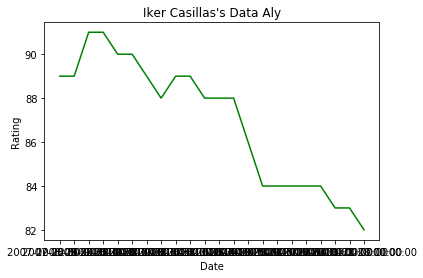

In [313]:
# 继续探索数据，解决你的附加研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。
sql_rating = 'SELECT date, overall_rating \
                FROM Player_Attributes \
                WHERE player_api_id = {} \
                ORDER BY date ASC \
                ;'.format(max_player_api_id)
result_rating = dbObj.execute(sql_rating)
# print(result_rating)

x = []
y = []
for line in result_rating:
    print(line)
    x.append(line[0])
    y.append(line[1])

# print(x)
# print(y)
plt.plot(x, y, 'g-')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('{}\'s Data Aly'.format(max_player_name))


<a id='conclusions'></a>
## 结论

> **提示**：最后，总结你的调查结果。确保了解探索结果的限制。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相互关系推导出因果关系！

> **提示**：如果对报告满意，应将其副本保存为 HTML 或 PDF 形式。导出报告之前请检查一遍，确保报告流程完整。应删除所有类似的“提示”引用段，以保持报告简洁。还需要查看课程结尾的项目提交页的项目审阅规范。

> 如需将报告导出到工作区，应运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，提交你的项目。恭喜！

2010/2011赛季, 评分表现最佳的球员为Juventus队的Iker Casillas, 评分为90.
此运动员的巅峰时期为2008-2009年, 最佳评分为91.

In [84]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1